# Summary

Give some statistics about the number of single units.

---

In [9]:
import os
import seaborn as sns
import pandas as pd

from popy.io_tools import load_neural_data
from popy.config import PROJECT_PATH_LOCAL

In [2]:
# load the summary file
summary = pd.read_csv(os.path.join(PROJECT_PATH_LOCAL, 'data', 'recordings_summary.csv'), dtype={'session': str})

summary


,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,monkey,recording_day,session,depth,session_of_day,position_MCC,position_LPFC,LPFC_spikes_exist,MCC_spikes_exist,behav_file_name,MCC_file_name,LPFC_file_name,interrupted_trials,session_complete,block_len_valid
0,0,0,0,0,ka,2020-05-23,230520,7042,1,gm,ki,False,True,ka230520_gmki_7042001.mat,spk_dataset_MCC_ka230520_001.txt,NaN,1.0,True,True
1,1,1,1,1,ka,2020-06-05,050620,6914,2,ej,jf,True,True,ka050620_ejjf_6914002.mat,spk_dataset_MCC_ka050620_002.txt,spk_dataset_LPFC_ka050620_002.txt,0.0,True,True
2,2,2,2,2,ka,2020-06-08,080620,7621,3,fn,kh,True,True,ka080620_fnkh_7621003.mat,spk_dataset_MCC_ka080620_003.txt,spk_dataset_LPFC_ka080620_003.txt,1.0,False,True
3,3,3,3,3,ka,2020-06-10,100620,7639,1,el,lg,True,True,ka100620_ellg_7639001.mat,spk_dataset_MCC_ka100620_001.txt,spk_dataset_LPFC_ka100620_001.txt,0.0,True,True
4,4,4,4,4,ka,2020-06-16,160620,8565,1,go,lj,True,True,ka160620_golj_8565001.mat,spk_dataset_MCC_ka160620_001.txt,spk_dataset_LPFC_ka160620_001.txt,1.0,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,124,124,124,124,po,2022-07-20,200722,5782,2,di,le,True,True,po200722_dile_5782002.mat,spk_dataset_MCC_po200722_002.txt,spk_dataset_LPFC_po200722_002.txt,0.0,True,True
125,125,125,125,125,po,2022-07-28,280722,5869,2,gh,pg,True,True,po280722_ghpg_5869002.mat,spk_dataset_MCC_po280722_002.txt,spk_dataset_LPFC_po280722_002.txt,1.0,True,True
126,126,126,126,126,po,2022-08-09,090822,5184,3,gp,ne,True,True,po090822_gpne_5184003.mat,spk_dataset_MCC_po090822_003.txt,spk_dataset_LPFC_po090822_003.txt,0.0,True,True
127,127,127,127,127,po,2022-08-31,310822,5522,1,gj,ld,True,True,po310822_gjld_5522001.mat,spk_dataset_MCC_po310822_001.txt,spk_dataset_LPFC_po310822_001.txt,2.0,True,True


In [41]:
units_summary = {}

res = []

summary_valid = summary[(summary.block_len_valid==True)]

for (monkey, session), subdf in summary_valid.groupby(['monkey', 'session']):
    # get spikes    
    neural_data = load_neural_data(monkey, session)
    
    # count the number of units in each area
    lpfc_units = np.count_nonzero(neural_data.area == 'LPFC')
    mcc_units = np.count_nonzero(neural_data.area == 'MCC')

    res.append({'monkey': monkey, 'session': session, 'area': 'LPFC', 'n_units': lpfc_units})
    res.append({'monkey': monkey, 'session': session, 'area': 'MCC', 'n_units': mcc_units})


units_summary = pd.DataFrame(res)
units_summary

,monkey,session,area,n_units
0,ka,010720,LPFC,16
1,ka,010720,MCC,22
2,ka,010822,LPFC,25
3,ka,010822,MCC,26
4,ka,010922,LPFC,42
...,...,...,...,...
229,po,300322,MCC,15
230,po,300421,LPFC,10
231,po,300421,MCC,23
232,po,310822,LPFC,23


Monkey ka # all units:
area
LPFC    1253
MCC     1462
Name: n_units, dtype: int64

Monkey po # all units:
area
LPFC     996
MCC     1377
Name: n_units, dtype: int64



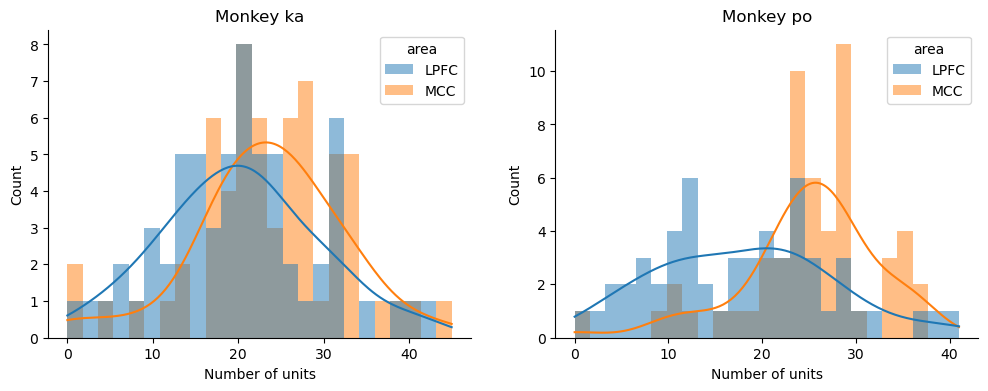

In [46]:
# plot histogram for both monkeys, showing the number of units in each area
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# hist for monkey 'ka'
for i, (monkey, data_temp) in enumerate(units_summary.groupby('monkey')):
    ax = axs[i]

    sns.histplot(data_temp, x='n_units', hue='area', ax=ax, bins=25, kde=True, edgecolor=None)
    ax.set_title(f'Monkey {monkey}')
    ax.set_xlabel('Number of units')
    ax.set_ylabel('Count')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    print(f'Monkey {monkey} # all units:')
    print(data_temp.groupby('area').n_units.sum())
    print()

